In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load your dataset
data = pd.read_csv(r'C:\Users\risha\Desktop\py\TASK 1\House Price India.csv')

In [2]:
# Displaying the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
   number of bedrooms  number of bathrooms  living area  lot area  \
0                   5                 2.50         3650      9050   
1                   4                 2.50         2920      4000   
2                   5                 2.75         2910      9480   
3                   4                 2.50         3310     42998   
4                   3                 2.00         2710      4500   
5                   3                 2.50         2600      4750   
6                   5                 3.25         3660     11995   
7                   3                 1.75         2240     10578   
8                   3                 2.50         2390      6550   
9                   4                 2.25         2200     11250   

   number of floors  grade of the house  \
0               2.0                  10   
1               1.5                   8   
2               1.5                   8   
3               2.0                   

In [3]:
# Checking the shape (number of rows and columns) of the dataset
print("\nDataset Shape (Rows, Columns):", data.shape)


Dataset Shape (Rows, Columns): (14620, 14)


In [4]:
# Displaying summary statistics of the dataset
print("\nSummary Statistics of the Dataset:")
print(data.describe())


Summary Statistics of the Dataset:
       number of bedrooms  number of bathrooms   living area      lot area  \
count        14620.000000         14620.000000  14620.000000  1.462000e+04   
mean             3.379343             2.129583   2098.262996  1.509328e+04   
std              0.938719             0.769934    928.275721  3.791962e+04   
min              1.000000             0.500000    370.000000  5.200000e+02   
25%              3.000000             1.750000   1440.000000  5.010750e+03   
50%              3.000000             2.250000   1930.000000  7.620000e+03   
75%              4.000000             2.500000   2570.000000  1.080000e+04   
max             33.000000             8.000000  13540.000000  1.074218e+06   

       number of floors  grade of the house  \
count      14620.000000        14620.000000   
mean           1.502360            7.682421   
std            0.540239            1.175033   
min            1.000000            4.000000   
25%            1.000000   

In [5]:
# Checking for missing values in the dataset
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
Price                                    0
dtype: int64


In [6]:
# Checking for duplicates and dropping if any
data.drop_duplicates(inplace=True)
print("\nDropping Duplicates. Shape of the Dataset after Duplicates Removal:", data.shape)


Dropping Duplicates. Shape of the Dataset after Duplicates Removal: (14618, 14)


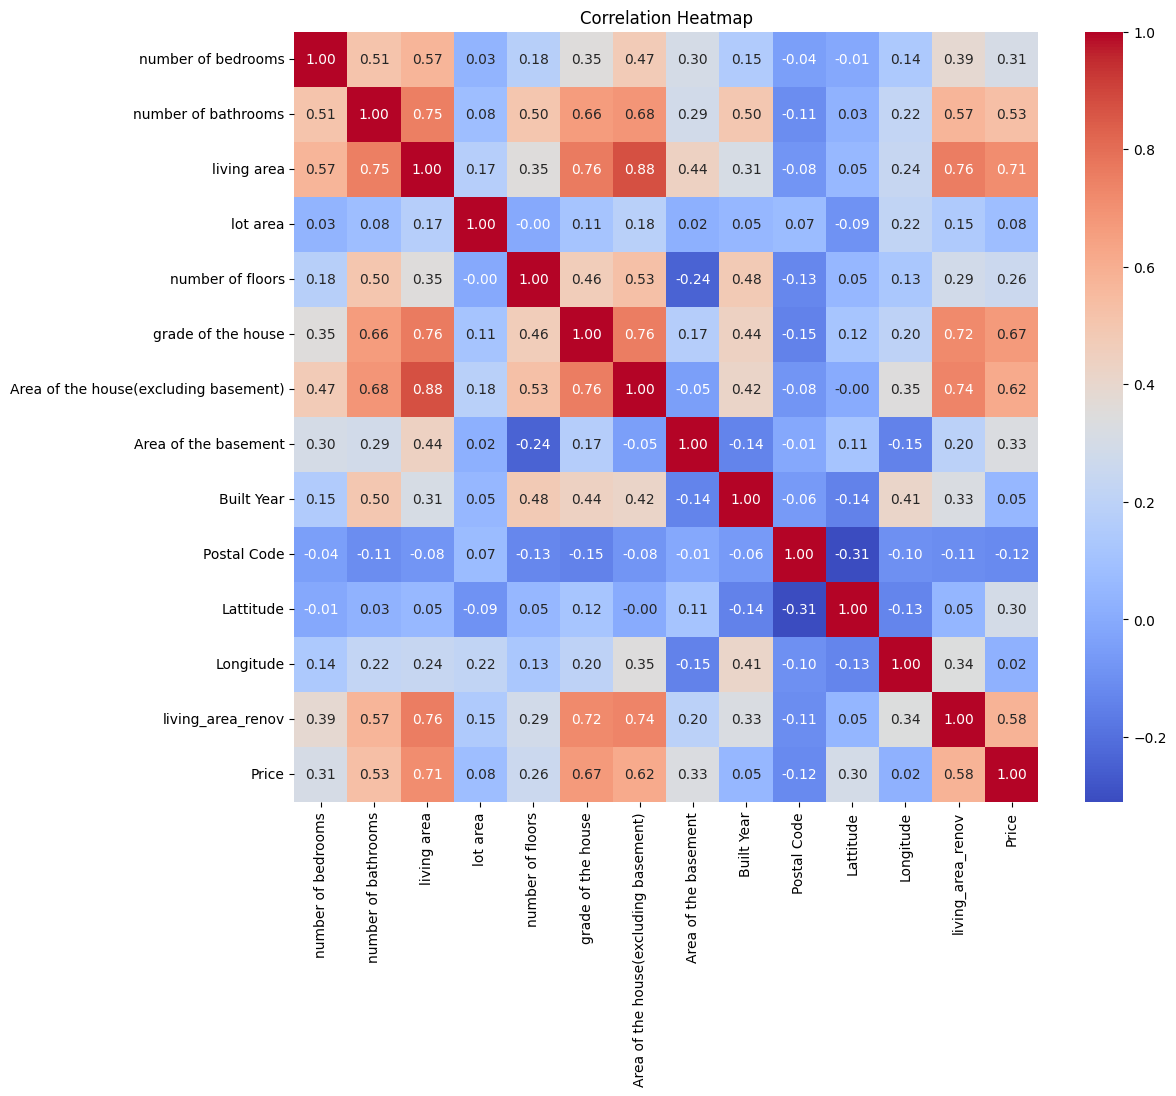

In [7]:
# Create a heatmap to visualize the correlation between features
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

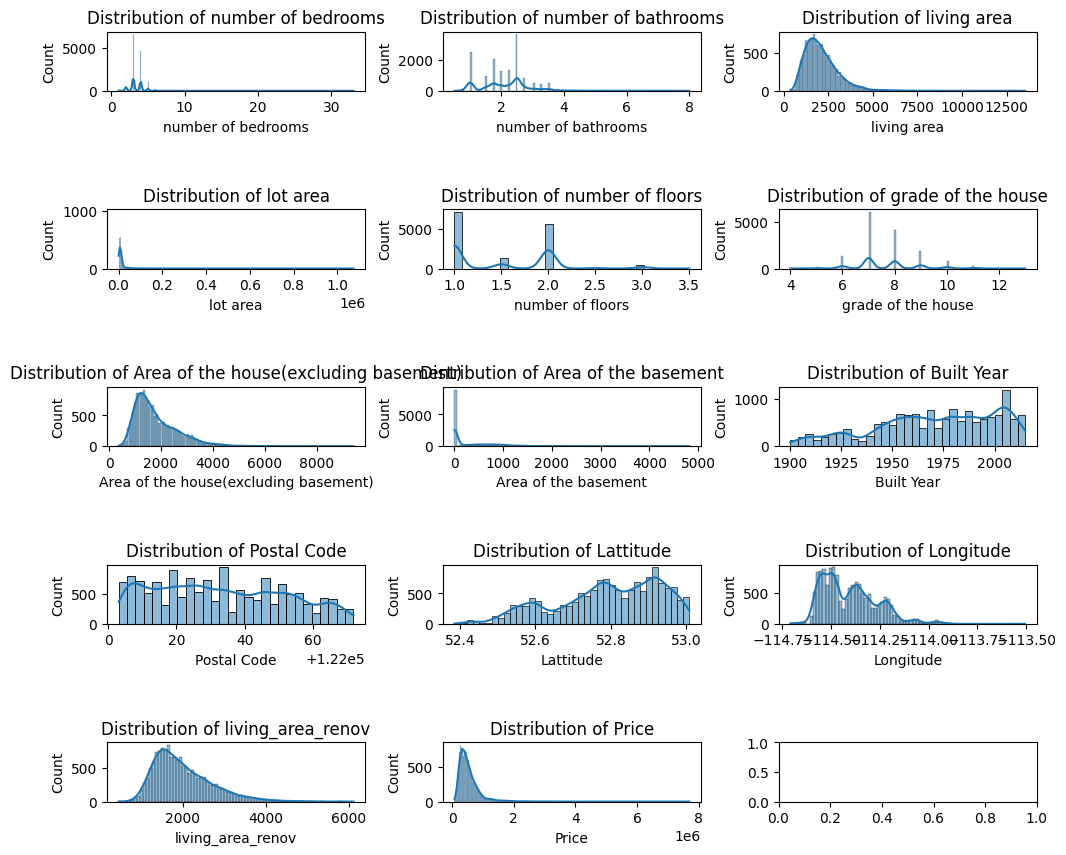

In [8]:
num_features = len(data.columns)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))
fig.subplots_adjust(hspace=2, wspace=0.3)  # Add horizontal and vertical spacing

for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {col}')

plt.show()



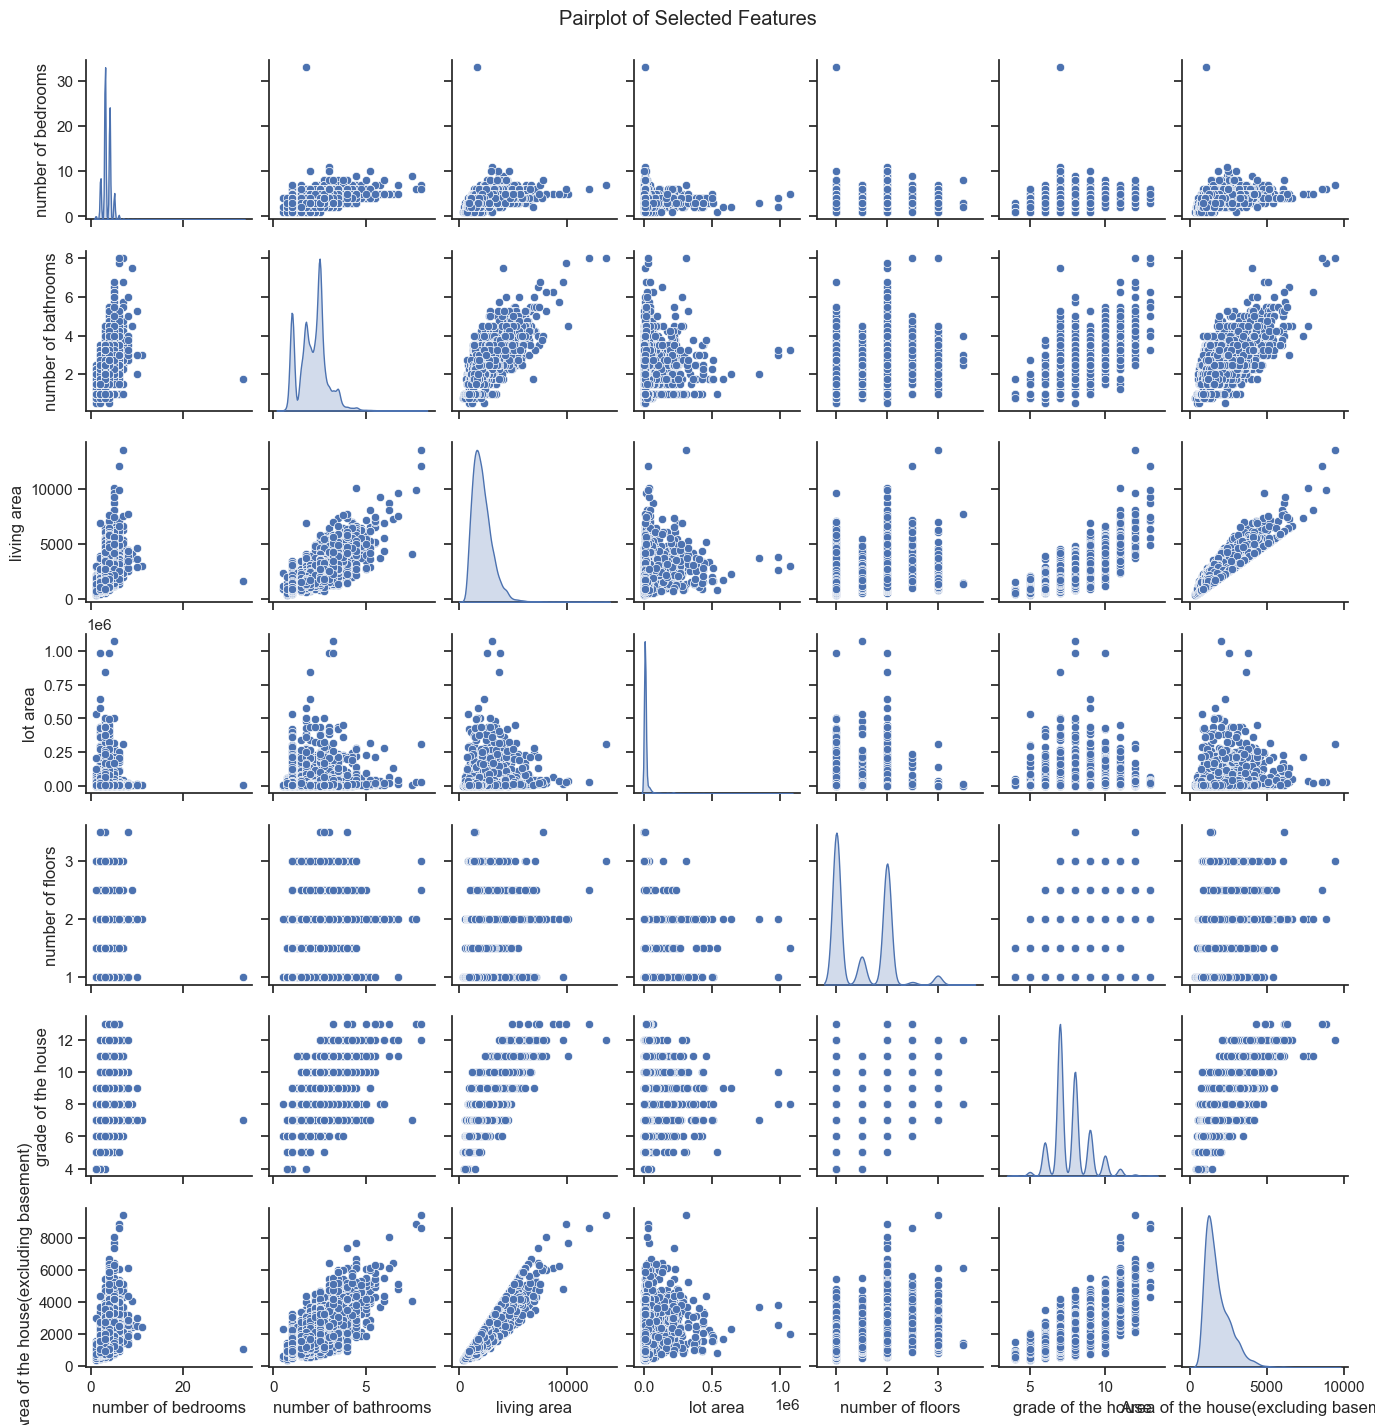

In [9]:
# Select a subset of features to visualize
selected_features = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
                     'number of floors', 'grade of the house', 'Area of the house(excluding basement)']
# Create a pairplot to visualize relationships between different features
sns.set(style="ticks")
sns.pairplot(data[selected_features], height=2, diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()



In [10]:
# Defining the Features/Independent Variables (X) and Target variable/Dependent Variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Training a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

R-squared (R^2): 68.57
Mean Absolute Error (MAE): 130503.68
Mean Squared Error (MSE): 40191456686.01
Root Mean Squared Error (RMSE): 200478.07


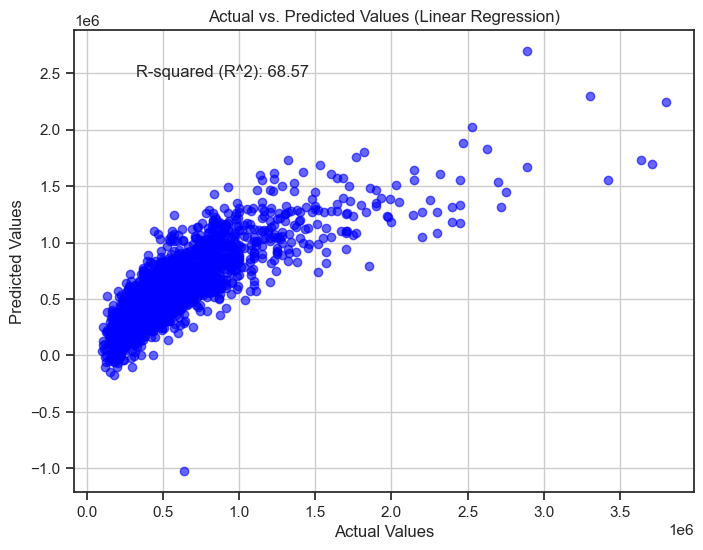

In [13]:
# Make predictions
y_pred_linear = model_linear.predict(X_test)

# Calculating evaluation metrics for the Linear Regression model
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

print(f'R-squared (R^2): {r2_linear*100:.2f}')
print(f'Mean Absolute Error (MAE): {mae_linear:.2f}')
print(f'Mean Squared Error (MSE): {mse_linear:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_linear:.2f}')

# Creating a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, c='blue', alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.text(0.1, 0.9, f'R-squared (R^2): {r2_linear*100:.2f}', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()

In [14]:
# Creating new data for prediction
new_data = pd.DataFrame({
    'number of bedrooms': [5],
    'number of bathrooms': [2.5],
    'living area': [3650],
    'lot area': [9050],
    'number of floors': [2],
    'grade of the house': [10],
    'Area of the house(excluding basement)': [3370],
    'Area of the basement': [280],
    'Built Year': [1921],
    'Postal Code': [122003],
    'Lattitude': [52.8645],
    'Longitude': [-114.557],
    'living_area_renov': [2880]
}, index=[0])

prediction = model_linear.predict(new_data)
print(f"Predicted Price: {prediction[0]:,.2f}")

Predicted Price: 1,261,530.08
